# Importation des données

1. & 2.

In [2]:
import pandas as pd
dpe_ex = pd.read_csv("./datasets/dpe-v2-logements-existants.csv")
dpe_ne = pd.read_csv("./datasets/dpe-v2-logements-neufs.csv")

C:\Users\cpecnik\AppData\Local\Temp\ipykernel_2552\2412417053.py:2: DtypeWarning: Columns (12,48,190,191,192,193) have mixed types. Specify dtype option on import or set low_memory=False.
  dpe_ex = pd.read_csv("./datasets/dpe-v2-logements-existants.csv")


3.

In [5]:
print(dpe_ex.shape)
print(dpe_ne.shape)

(16069, 242)
(2851, 220)


4.

In [9]:
dpe_ex["Logement"] = "ancien"
dpe_ne["Logement"] = "neuf"

5.

In [16]:
dpe_ne["Année_construction"] = float(2025)
dpe_ne["Année_construction"].head()

0    2025.0
1    2025.0
2    2025.0
3    2025.0
4    2025.0
Name: Année_construction, dtype: float64

6.

In [17]:
dpe_merge = pd.concat([dpe_ex, dpe_ne])
dpe_merge.head()

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Coût_5_usages_énergie_n°3,Emission_GES_chauffage_par_énergie_n°3,Emission_GES_ECS_par_énergie_n°3,Clé_répartition_chauffage,Besoin_refroidissement_annuel,Description_générateur_froid,Production_électricité_PV_kWh,Production_électricité_PV_kWh/m²,Déperditions_totales_logement,Déperditions_totales_bâtiment
0,2369E1626603K,2023-05-17,2023-05-16,2023-05-15,DPE 3CL 2021 méthode logement,NaN,2033-05-15,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2469E2448797H,2024-07-06,2024-07-05,2024-07-03,DPE 3CL 2021 méthode logement,NaN,2034-07-04,2.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2469E1154509Z,2024-03-29,2024-03-28,2024-03-28,DPE 3CL 2021 méthode logement,NaN,2034-03-27,2.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2269E1396880W,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2269E1396877T,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


7.

In [29]:
dpe_merge["Année reception DPE"] = pd.to_datetime(dpe_merge["Date_réception_DPE"]).dt.year

C:\Users\cpecnik\AppData\Local\Temp\ipykernel_2552\2134807231.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dpe_merge["Année reception DPE"] = pd.to_datetime(dpe_merge["Date_réception_DPE"]).dt.year


In [30]:
dpe_merge["Année reception DPE"]

0       2023
1       2024
2       2024
3       2022
4       2022
        ... 
2846    2024
2847    2024
2848    2024
2849    2024
2850    2024
Name: Année reception DPE, Length: 18920, dtype: int32

8.

In [51]:
def verif_tt(row):
    total = row["Coût_total_5_usages"]

    somme = (
        row["Coût_chauffage"]
        + row["Coût_éclairage"]
        + row["Coût_ECS"]
        + row["Coût_refroidissement"]
        + row["Coût_auxiliaires"]
    )
    return total == somme

In [52]:
dpe_merge["Ctt_juste"] = dpe_merge.apply(verif_tt, axis=1)

C:\Users\cpecnik\AppData\Local\Temp\ipykernel_2552\1214145826.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dpe_merge["Ctt_juste"] = dpe_merge.apply(verif_tt, axis=1)


In [53]:
dpe_merge["Ctt_juste"]

0       False
1        True
2       False
3       False
4       False
        ...  
2846    False
2847    False
2848    False
2849    False
2850    False
Name: Ctt_juste, Length: 18920, dtype: bool

9.

In [57]:
def to_prct(row):
    total = row["Coût_total_5_usages"]

    c_c = row["Coût_chauffage"]

    return (c_c / total) * 100

In [58]:
dpe_merge["Coût chauffage en %"] =  dpe_merge.apply(to_prct, axis=1)

In [59]:
dpe_merge["Coût chauffage en %"]

0       63.641364
1       41.507382
2       86.977330
3       59.262865
4       60.399637
          ...    
2846    60.269360
2847    62.416107
2848    65.258216
2849    65.258216
2850    62.416107
Name: Coût chauffage en %, Length: 18920, dtype: float64

10.

In [62]:
import numpy as np

def per_cons(row):
    year = row["Année_construction"]
    result = ""
    if(year <= 1960):
        result = "Avant 1960"
    elif(1961 <= year and year <= 1970):
        result = "1961 - 1970"
    elif(1971 <= year and year <= 1980):
        result = "1971 - 1980"
    elif(1981 <= year and year <= 1990):
        result = "1981 - 1990"
    elif(1991 <= year and year <= 2000):
        result = "1991 - 2000"
    elif(2001 <= year and year <= 2010):
        result = "2001 - 2010"
    else:
        result = "Après 2010"

    return result

In [63]:

dpe_merge["Période Construction"] = dpe_merge.apply(per_cons,axis=1)

C:\Users\cpecnik\AppData\Local\Temp\ipykernel_2552\3799266660.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dpe_merge["Période Construction"] = dpe_merge.apply(per_cons,axis=1)


In [66]:
dpe_merge["Période Construction"]

0       2001 - 2010
1        Après 2010
2        Après 2010
3        Après 2010
4        Après 2010
           ...     
2846     Après 2010
2847     Après 2010
2848     Après 2010
2849     Après 2010
2850     Après 2010
Name: Période Construction, Length: 18920, dtype: object

# Statistiques générales

1.

In [80]:
dpe_merge["Etiquette_DPE"].value_counts(normalize=True) * 100

Etiquette_DPE
C    39.582452
D    28.705074
E    17.864693
F     5.274841
B     5.142706
G     2.912262
A     0.517970
Name: proportion, dtype: float64

2.

In [81]:
dpe_merge["Date_réception_DPE"].value_counts(normalize=True) * 100

Date_réception_DPE
2022-09-19    3.271670
2023-07-31    1.738901
2023-01-13    1.723044
2022-07-06    1.612051
2023-01-27    1.152220
                ...   
2023-01-07    0.005285
2023-07-01    0.005285
2023-09-02    0.005285
2023-08-11    0.005285
2023-08-19    0.005285
Name: proportion, Length: 1059, dtype: float64

3.

In [82]:
dpe_merge["Logement"].value_counts(normalize=True) * 100

Logement
ancien    84.93129
neuf      15.06871
Name: proportion, dtype: float64

4.

In [83]:
dpe_merge["Type_bâtiment"].value_counts(normalize=True) * 100

Type_bâtiment
appartement    97.251586
maison          1.733615
immeuble        1.014799
Name: proportion, dtype: float64

5.

In [79]:
dpe_merge["Type_installation_chauffage"].value_counts(normalize=True) * 100

Type_installation_chauffage
individuel                      62.530991
collectif                       33.313571
mixte (collectif-individuel)     4.155438
Name: proportion, dtype: float64

6.

In [88]:
dpe_merge["Période Construction"].value_counts(normalize=True) * 100

Période Construction
Après 2010     50.729387
Avant 1960     15.613108
1971 - 1980     7.711416
1991 - 2000     7.235729
2001 - 2010     6.411205
1981 - 1990     6.331924
1961 - 1970     5.967230
Name: proportion, dtype: float64

7.

In [70]:
dpe_merge["Surface_habitable_logement"].mean()

np.float64(56.568295024265375)

8.

In [75]:
dpe_merge["Coût_chauffage"].mean()

np.float64(711.6565591966173)

9.

In [74]:
print(dpe_merge["Coût_ECS"].quantile([0.25,0.5,0.75]))
print(dpe_merge["Coût_ECS"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))

0.25    181.0
0.50    253.0
0.75    345.0
Name: Coût_ECS, dtype: float64
0.1    140.6
0.2    170.6
0.3    191.5
0.4    215.5
0.5    253.0
0.6    287.4
0.7    322.7
0.8    365.4
0.9    410.2
Name: Coût_ECS, dtype: float64


10.

In [78]:
dpe_merge["Surface_habitable_logement"].corr(dpe_merge["Coût_chauffage"])

np.float64(0.5486576341483371)

11.

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

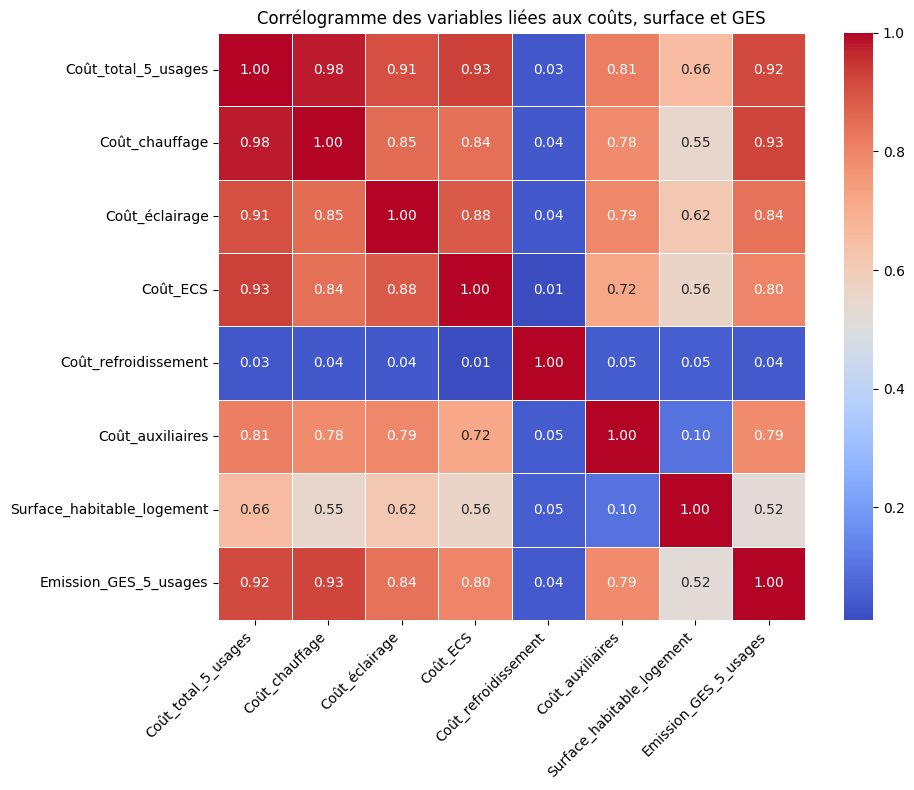

In [90]:
colonnes_corr = [
    "Coût_total_5_usages",
    "Coût_chauffage",
    "Coût_éclairage",
    "Coût_ECS",
    "Coût_refroidissement",
    "Coût_auxiliaires",
    "Surface_habitable_logement",
    "Emission_GES_5_usages"
]

df_corr = dpe_merge[colonnes_corr]

corr_matrix = df_corr.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Corrélogramme des variables liées aux coûts, surface et GES")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filtre

1.

In [102]:
df_appart = dpe_merge[dpe_merge["Type_bâtiment"] == "appartement"]

In [104]:
df_appart["Type_bâtiment"].value_counts(normalize=True) * 100

Type_bâtiment
appartement    100.0
Name: proportion, dtype: float64

2.

In [105]:
df_eti = dpe_merge[dpe_merge["Etiquette_DPE"].isin(["D", "E", "F", "G"])]

In [106]:
df_eti["Etiquette_DPE"].value_counts(normalize=True) * 100

Etiquette_DPE
D    52.422780
E    32.625483
F     9.633205
G     5.318533
Name: proportion, dtype: float64

3.

In [107]:
df_cons = dpe_merge[dpe_merge["Période Construction"] == "Avant 1960"]

In [108]:
df_cons["Période Construction"].value_counts(normalize=True) * 100

Période Construction
Avant 1960    100.0
Name: proportion, dtype: float64

4.

In [109]:
df_surf_sup = dpe_merge[dpe_merge["Surface_habitable_logement"] > dpe_merge["Surface_habitable_logement"].mean()]

In [111]:
df_surf_sup["Surface_habitable_logement"].value_counts(normalize=True) * 100

Surface_habitable_logement
72.0      3.465746
88.0      3.131836
66.0      2.717329
64.0      2.682786
67.0      2.291307
            ...   
1940.6    0.011514
130.8     0.011514
137.7     0.011514
100.6     0.011514
619.0     0.011514
Name: proportion, Length: 779, dtype: float64

5.

In [112]:
df_p_conso = dpe_merge.sort_values(by="Conso_5_usages/m²_é_finale", ascending=False)

In [113]:
df_p_conso["Conso_5_usages/m²_é_finale"].value_counts(normalize=True) * 100

Conso_5_usages/m²_é_finale
142.0    1.004228
76.0     1.004228
84.0     0.919662
258.0    0.803383
135.0    0.787526
           ...   
628.0    0.005285
627.7    0.005285
611.0    0.005285
603.0    0.005285
599.0    0.005285
Name: proportion, Length: 1784, dtype: float64

6.

In [119]:
df_tri_eti = dpe_merge.sort_values(
    by=["Etiquette_DPE", "Période_construction", "Coût_chauffage"],
    ascending=[True, True, False]  # Dernier critère en décroissant
)

df_tri_eti.head()

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Besoin_refroidissement_annuel,Description_générateur_froid,Production_électricité_PV_kWh,Production_électricité_PV_kWh/m²,Déperditions_totales_logement,Déperditions_totales_bâtiment,Année reception DPE,Ctt_juste,Coût chauffage en %,Période Construction
10767,2269E2835978U,2022-11-27,2022-11-26,2022-11-21,DPE 3CL 2021 méthode logement,NaN,2032-11-25,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022,True,62.463580,Après 2010
14631,2369E3249990J,2023-09-28,2023-09-27,2023-09-26,DPE 3CL 2021 méthode logement,NaN,2033-09-26,2.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023,False,76.016348,Après 2010
5321,2269E2194556S,2022-09-23,2022-09-22,2022-09-22,DPE 3CL 2021 méthode logement,NaN,2032-09-21,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022,True,39.904610,Après 2010
1635,2469E2650900M,2024-07-22,2024-07-21,2024-07-18,DPE 3CL 2021 méthode logement,2469E2650840E,2034-07-20,2.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,True,70.999745,Après 2010
15302,2369E2910614L,2023-09-01,2023-08-31,2023-08-30,DPE 3CL 2021 méthode logement,NaN,2033-08-30,2.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023,True,46.391040,Après 2010


# Agrégation

1.

In [121]:
cout_chauffage_par_dpe = dpe_merge.groupby("Etiquette_DPE")["Coût_chauffage"].mean()
cout_chauffage_par_dpe

Etiquette_DPE
A     193.414286
B     170.926413
C     502.142449
D     718.573301
E    1049.023521
F    1298.834669
G    1405.123775
Name: Coût_chauffage, dtype: float64

2.

In [122]:
cout_conso_par_periode = dpe_merge.groupby("Période Construction")["Conso_5_usages_é_finale"].mean().round(2)
cout_conso_par_periode

Période Construction
1961 - 1970    16549.45
1971 - 1980    21885.36
1981 - 1990     9671.87
1991 - 2000     7921.23
2001 - 2010     6668.00
Après 2010      7874.25
Avant 1960     14754.98
Name: Conso_5_usages_é_finale, dtype: float64

3.

In [123]:
cout_conso_par_periode = dpe_merge.groupby(by=["Logement", "Etiquette_DPE"])["Conso_5_usages_é_finale"].mean().round(2)
cout_conso_par_periode

Logement  Etiquette_DPE
ancien    A                 5729.18
          B                 4201.27
          C                 9775.56
          D                10713.67
          E                14659.29
          F                15538.94
          G                14657.47
neuf      A                 3625.94
          B                 4513.49
          C                 5170.70
          D                 5178.53
          E                 3110.75
Name: Conso_5_usages_é_finale, dtype: float64

# Création de graphique

## Graphiques élémentaires

1.

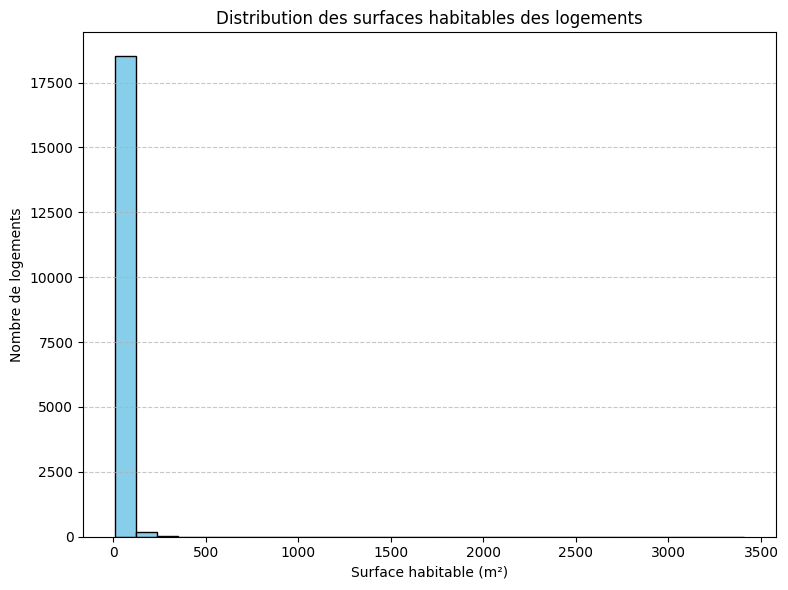

In [125]:
plt.figure(figsize=(8, 6))
plt.hist(dpe_merge["Surface_habitable_logement"].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution des surfaces habitables des logements")
plt.xlabel("Surface habitable (m²)")
plt.ylabel("Nombre de logements")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2.

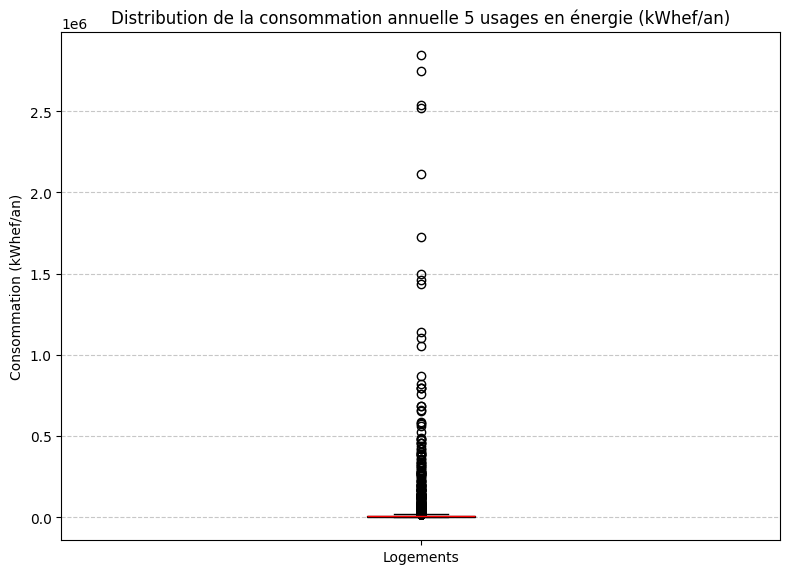

In [128]:
plt.figure(figsize=(8, 6))
plt.boxplot(dpe_merge["Conso_5_usages_é_finale"].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'))

plt.title("Distribution de la consommation annuelle 5 usages en énergie (kWhef/an)")
plt.ylabel("Consommation (kWhef/an)")
plt.xticks([1], ["Logements"])  # Nom sur l’axe x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3.

C:\Users\cpecnik\AppData\Local\Temp\ipykernel_2552\30316048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dpe_merge, x="Etiquette_DPE", y="Coût_chauffage", palette="Set3")


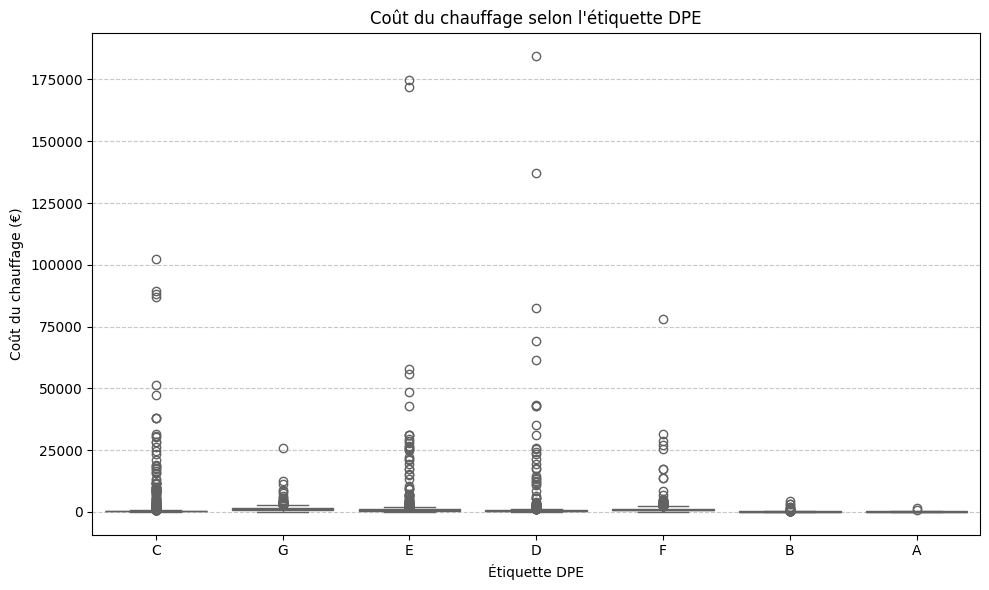

In [129]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dpe_merge, x="Etiquette_DPE", y="Coût_chauffage", palette="Set3")

plt.title("Coût du chauffage selon l'étiquette DPE")
plt.xlabel("Étiquette DPE")
plt.ylabel("Coût du chauffage (€)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4.

C:\Users\cpecnik\AppData\Local\Temp\ipykernel_2552\201898509.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dpe_merge, x="Période Construction", order=sorted(dpe_merge["Période Construction"].dropna().unique()), palette="Blues")


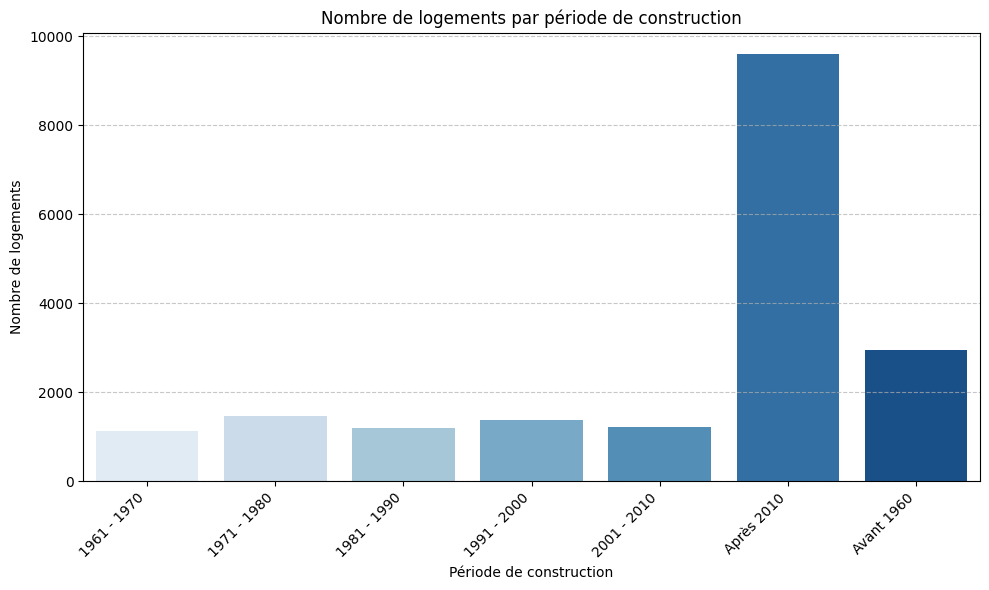

In [132]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=dpe_merge, x="Période Construction", order=sorted(dpe_merge["Période Construction"].dropna().unique()), palette="Blues")

plt.title("Nombre de logements par période de construction")
plt.xlabel("Période de construction")
plt.ylabel("Nombre de logements")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

5.

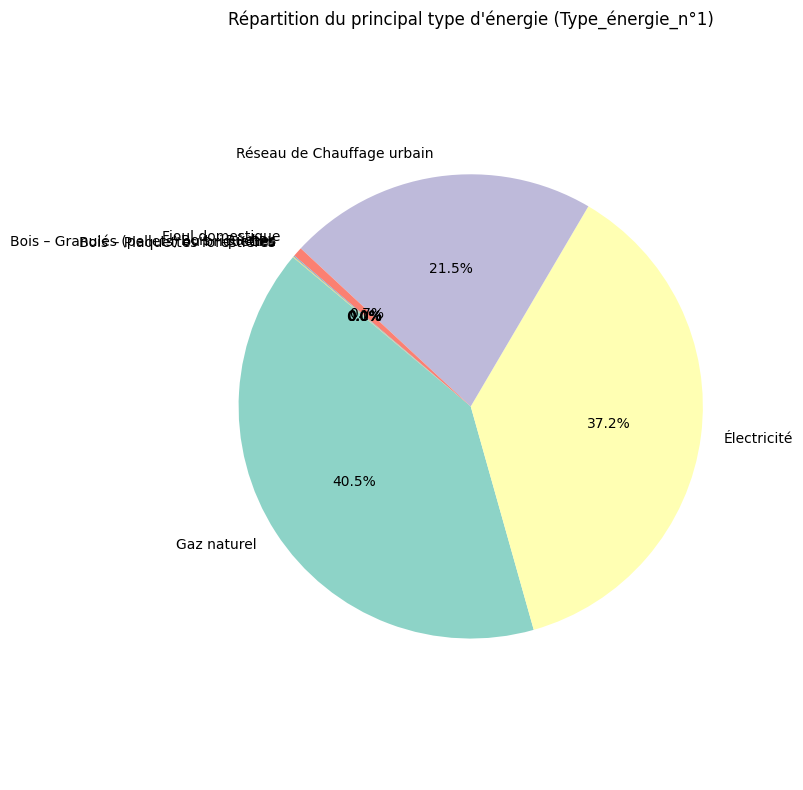

In [134]:
repartition_energie = dpe_merge["Type_énergie_n°1"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    repartition_energie,
    labels=repartition_energie.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)

plt.title("Répartition du principal type d'énergie (Type_énergie_n°1)")
plt.axis('equal')
plt.tight_layout()
plt.show()

## Régression linéaire simple

1.

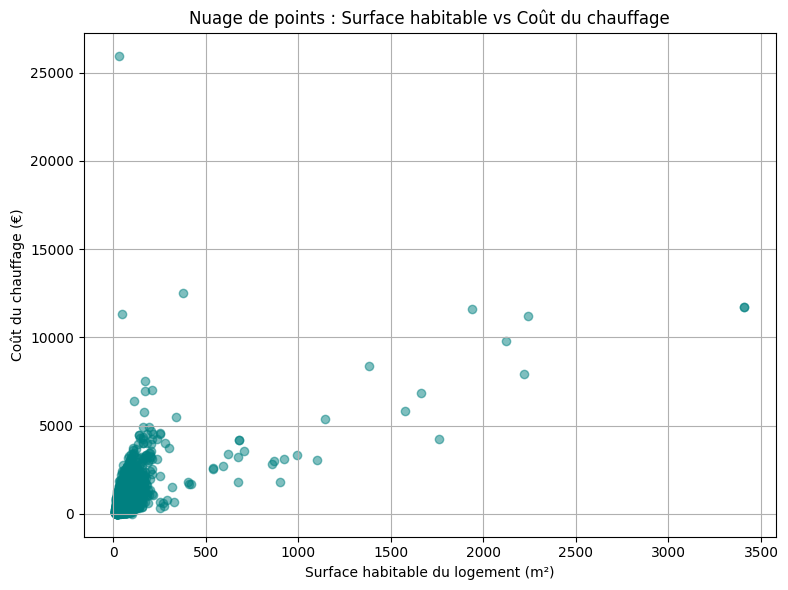

In [136]:
df_scatter = dpe_merge.dropna(subset=["Surface_habitable_logement", "Coût_chauffage"])

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter["Surface_habitable_logement"], df_scatter["Coût_chauffage"], alpha=0.5, color='teal')

plt.title("Nuage de points : Surface habitable vs Coût du chauffage")
plt.xlabel("Surface habitable du logement (m²)")
plt.ylabel("Coût du chauffage (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

2.

In [137]:
df_corr = dpe_merge[["Surface_habitable_logement", "Coût_chauffage"]].dropna()

correlation = df_corr["Surface_habitable_logement"].corr(df_corr["Coût_chauffage"])

print(f"Coefficient de corrélation : {correlation:.3f}")

Coefficient de corrélation : 0.549


3.

In [138]:
from sklearn.linear_model import LinearRegression
df_lr = dpe_merge[["Surface_habitable_logement", "Coût_chauffage"]].dropna()

X = df_lr[["Surface_habitable_logement"]]
y = df_lr["Coût_chauffage"]

model = LinearRegression()
model.fit(X, y)

a = model.coef_[0]
b = model.intercept_

print(f"Équation de la régression : Coût_chauffage = {a:.2f} × Surface_habitable + {b:.2f}")
print(f"Score R² du modèle : {model.score(X, y):.3f}")

Équation de la régression : Coût_chauffage = 4.80 × Surface_habitable + 250.05
Score R² du modèle : 0.301


4.

In [142]:
a = model.coef_[0]
print(f"Coefficient directeur (a) = {a:.2f}")
b = model.intercept_
print(f"Ordonnée à l’origine (b) = {b:.2f}")
r2 = model.score(X, y)
print(f"R² = {r2:.3f}")

Coefficient directeur (a) = 4.80
Ordonnée à l’origine (b) = 250.05
R² = 0.301


5.

c:\Users\cpecnik\Documents\PYTHON\CHAP1\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


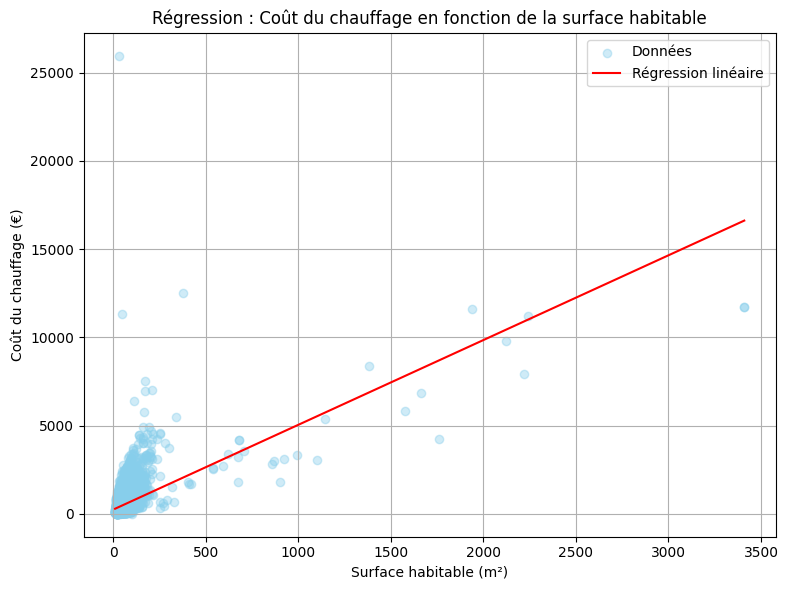

In [139]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.4, label="Données", color="skyblue")

x_vals = np.linspace(X.min(), X.max(), 100)
y_vals = model.predict(x_vals)

plt.plot(x_vals, y_vals, color="red", label="Régression linéaire")

plt.title("Régression : Coût du chauffage en fonction de la surface habitable")
plt.xlabel("Surface habitable (m²)")
plt.ylabel("Coût du chauffage (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Cartographie

1. & 2.

In [144]:
addresses = pd.read_csv("./datasets/adresses-69.csv", sep=";")

C:\Users\cpecnik\AppData\Local\Temp\ipykernel_2552\1802632664.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  addresses = pd.read_csv("./datasets/adresses-69.csv", sep=";")


3.

In [146]:
dpe_merge_geo = dpe_merge.merge(addresses, left_on="Identifiant__BAN", right_on="id", how="left")

4.

In [160]:
from pyproj import Transformer
import folium

# Crée un transformeur de Lambert 93 vers WGS84 (lat/lon)
transformer = Transformer.from_crs("EPSG:2154", "EPSG:4326", always_xy=True)

# Applique la transformation sur toute ta DataFrame
dpe_merge_geo["lon"], dpe_merge_geo["lat"] = transformer.transform(dpe_merge_geo["x"].values, dpe_merge_geo["y"].values)

# Calcul des moyennes sur les bonnes colonnes
latitude_moy = dpe_merge_geo["lat"].mean()
longitude_moy = dpe_merge_geo["lon"].mean()

# Création de la carte avec les coordonnées converties
carte = folium.Map(location=[latitude_moy, longitude_moy], zoom_start=12)

for idx, row in dpe_merge_geo.dropna(subset=["lat", "lon"]).iterrows():
    popup_text = (f"<b>Coût chauffage:</b> {row['Coût_chauffage']} €<br>"
                  f"<b>Surface habitable:</b> {row['Surface_habitable_logement']} m²<br>"
                  f"<b>Étiquette DPE:</b> {row.get('Etiquette_DPE', 'N/A')}")
    
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=5,
        color='blue',
        fill=True,
        fill_color='cyan',
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(carte)

In [161]:
carte.save("index.html")